<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S4_resist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4
## Robustness and resilience of networked systems

In [1]:
import networkx as nx
n = 40
G = nx.barabasi_albert_graph(n, 5)
m = G.number_of_edges()

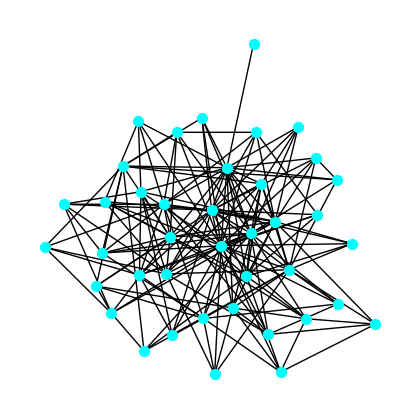

In [2]:
L = nx.kamada_kawai_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G, L, node_size = 50, node_color = 'cyan')

In [3]:
count = 5
for e in G.edges():
  print(e)
  count -= 1
  if count == 0:
    break

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)


In [4]:
!pip install celluloid

38 7
7 25
25 18
18 24
24 20
20 6
6 0
0 18
18 9
9 34
34 4
4 11


[]

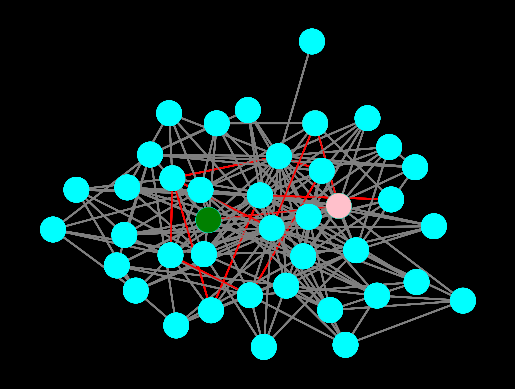

In [5]:
from random import choice # pseudo-randomness
from celluloid import Camera # creating animations

fig, ax = plt.subplots()
cam = Camera(fig) # for storing the frames

current = choice(list(G.nodes()))

used = set()
for step in range(12): # random walk
    neighbor = choice(list(G.neighbors(current)))
    used.add((current, neighbor))
    used.add((neighbor, current))

    vc = [ 'cyan' for v in G.nodes() ]
    vc[current] = 'pink'
    vc[neighbor] = 'green'

    ec = [ 'red' if e in used else 'gray' for e in G.edges() ]

    nx.draw(G, pos = L, node_color = vc, edge_color = ec)

    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.axis('off')
    print(current, neighbor)
    cam.snap() # take a snapshot
    current = neighbor

cam.snap() # take a snapshot at the end

In [6]:
import IPython
animation = cam.animate(interval = 600) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))

Graphs: connected components

In [7]:
from random import choice

Gc = G.copy()
goal = 3 # to how many pieces we wish to break it
n = G.number_of_nodes()
m = G.number_of_edges()

while True:
  broken = choice(list(Gc.nodes))
  Gc.remove_node(broken)
  nNow = Gc.number_of_nodes()
  mNow = Gc.number_of_edges()
  print(f'{nNow} vertices, down from {n}')
  print(f'{mNow} edges, down from {m}')
  comp = [ cc for cc in nx.connected_components(Gc) ]
  pieces = len(comp)
  if pieces == 1:
    avgd = nx.average_shortest_path_length(Gc)
    print(f'Avg distance now at {avgd:.2f}')
  elif pieces >= goal:
    break

39 vertices, down from 40
159 edges, down from 175
Avg distance now at 1.88
38 vertices, down from 40
152 edges, down from 175
Avg distance now at 1.89
37 vertices, down from 40
149 edges, down from 175
Avg distance now at 1.86
36 vertices, down from 40
148 edges, down from 175
Avg distance now at 1.82
35 vertices, down from 40
144 edges, down from 175
Avg distance now at 1.81
34 vertices, down from 40
139 edges, down from 175
Avg distance now at 1.81
33 vertices, down from 40
130 edges, down from 175
Avg distance now at 1.81
32 vertices, down from 40
115 edges, down from 175
Avg distance now at 1.86
31 vertices, down from 40
103 edges, down from 175
Avg distance now at 1.89
30 vertices, down from 40
97 edges, down from 175
Avg distance now at 1.89
29 vertices, down from 40
94 edges, down from 175
Avg distance now at 1.87
28 vertices, down from 40
91 edges, down from 175
Avg distance now at 1.84
27 vertices, down from 40
87 edges, down from 175
Avg distance now at 1.83
26 vertices, dow

In [8]:
cc = nx.connected_components(Gc)
for comp in cc:
  print(len(comp))

2
2
2


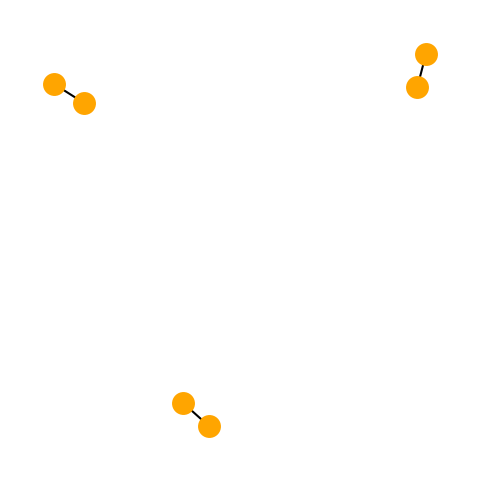

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (3, 3), dpi =  150)
nx.draw(Gc, pos = nx.spring_layout(Gc), node_size = 100, node_color = 'orange')